In [1]:
%reset

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torch.optim import Adam
import matplotlib.pyplot as plt
import numpy as np

print('Imported libraries')

Imported libraries


In [3]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [4]:
# Define hyperparameters
num_epochs = 0
batch_size = 4
learning_rate = 0.001

In [5]:
# Define transformation to randomly augment image data
transformer = transforms.Compose([
    transforms.Resize([200,200]), # to ensure all images are the same size
    transforms.RandomHorizontalFlip(), 
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(), # 0-255 to 0-1, numpy to tensors
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]) # 0-1 to [-1,1], formula (x-mean)/std
])

In [6]:
# Load dataset
train_path = '../Datasets/asl_alphabet_train/'
# test_path = '../Datasets/asl_alphabet_test/'

full_dataset = ImageFolder(root=train_path,
                           transform=transformer)

train_size = int(0.7 * len(full_dataset))
test_size = len(full_dataset) - train_size

train_dataset, test_dataset = random_split(full_dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset,
                          batch_size=4,
                          shuffle=True)

test_loader = DataLoader(test_dataset,
                         batch_size=4,
                         shuffle=True)

In [7]:
# Define classes
classes = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 
           'H', 'I', 'J', 'K', 'L', 'M', 'N', 
           'nothing', 'O', 'P', 'Q', 'R', 'S', 'space', 
           'T', 'U', 'V', 'W', 'X', 'Y', 'Z')
print(classes)

('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'nothing', 'O', 'P', 'Q', 'R', 'S', 'space', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z')


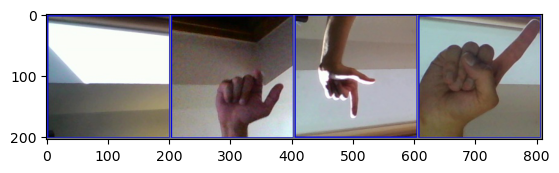

In [8]:
# Show random training images
def show_image(img):
    img = img / 2 + 0.5 # unnormalise
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()

dataiter = iter(train_loader)
images, labels = next(dataiter)
show_image(torchvision.utils.make_grid(images))

In [13]:
conv1 = nn.Conv2d(3, 6, 5)
pool = nn.MaxPool2d(2, 2)
conv2 = nn.Conv2d(6, 16, 5)
fc1 = nn.Linear(16 * 47 * 47, 256)
fc2 = nn.Linear(256, 120)
fc3 = nn.Linear(120, 28)

print(images.shape)
x = conv1(images)
print(x.shape)
x = F.relu(x)
print(x.shape)
x = pool(x)
print(x.shape)
x = conv2(x)
print(x.shape)
x = pool(x)
print(x.shape)
x = x.view(-1, 16 * 47 * 47)
print(x.shape)
x = fc1(x)
print(x.shape)
x = F.relu(x)
print(x.shape)
x = fc2(x)
print(x.shape)
x = F.relu(x)
print(x.shape)
x = fc3(x)
print(x.shape)

torch.Size([4, 3, 200, 200])
torch.Size([4, 6, 196, 196])
torch.Size([4, 6, 196, 196])
torch.Size([4, 6, 98, 98])
torch.Size([4, 16, 94, 94])
torch.Size([4, 16, 47, 47])
torch.Size([4, 35344])
torch.Size([4, 256])
torch.Size([4, 256])
torch.Size([4, 120])
torch.Size([4, 120])
torch.Size([4, 28])
